In [1]:
import torch
from PIL import Image
from torchvision.transforms import v2
import torchvision.transforms as v1
from torch import nn
import numpy as np
from tqdm import tqdm
import random
import os
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import cv2

device = "cuda" if torch.cuda.is_available() else "cpu"

input_dir = "/kaggle/input/blood-vessel-segmentation/"
train_dir = input_dir + "train/"
imgs_dir = f"{train_dir}kidney_1_dense/images/"
msks_dir = f"{train_dir}kidney_1_dense/labels/"
slices_ids = sorted(os.listdir(imgs_dir))

In [2]:
idx = torch.randint(len(slices_ids), (1,)).item()
slice_id = slices_ids[idx]
img_path = imgs_dir + slice_id
img_path


'/kaggle/input/blood-vessel-segmentation/train/kidney_1_dense/images/1530.tif'

### Raw PIL image

In [3]:
img = Image.open(img_path)

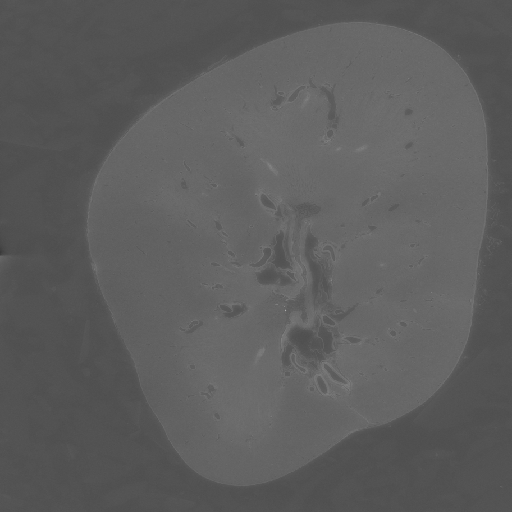

In [4]:
img.resize((512, 512))

### Numpy array

In [5]:
img_arr = np.array(img)
img_arr

array([[21786, 21531, 21543, ..., 21194, 21419, 21438],
       [21689, 21166, 21371, ..., 21526, 21486, 21651],
       [21535, 21508, 21521, ..., 21775, 21772, 22060],
       ...,
       [21312, 21592, 20978, ..., 21346, 21684, 21367],
       [21397, 21323, 21233, ..., 21419, 21547, 21428],
       [21887, 21280, 21589, ..., 21493, 21376, 20770]], dtype=uint16)

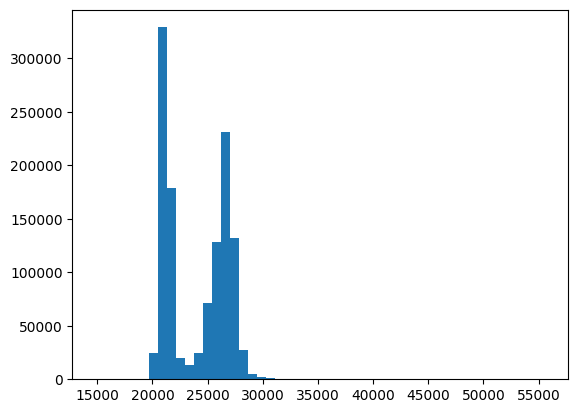

In [6]:
plt.hist(img_arr.reshape(-1), 50);

### Using CV2 with IMREAD_GRAYSCALE

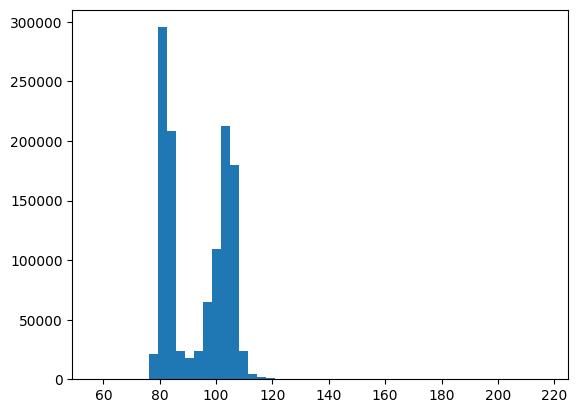

In [7]:
cv2_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.hist(cv2_arr.reshape(-1), 50);

### Pytorch ToTensor 

In [8]:
img_t = v1.ToTensor()(img)
img_t

tensor([[[21786, 21531, 21543,  ..., 21194, 21419, 21438],
         [21689, 21166, 21371,  ..., 21526, 21486, 21651],
         [21535, 21508, 21521,  ..., 21775, 21772, 22060],
         ...,
         [21312, 21592, 20978,  ..., 21346, 21684, 21367],
         [21397, 21323, 21233,  ..., 21419, 21547, 21428],
         [21887, 21280, 21589,  ..., 21493, 21376, 20770]]], dtype=torch.int16)

min: -32734
max: 32763


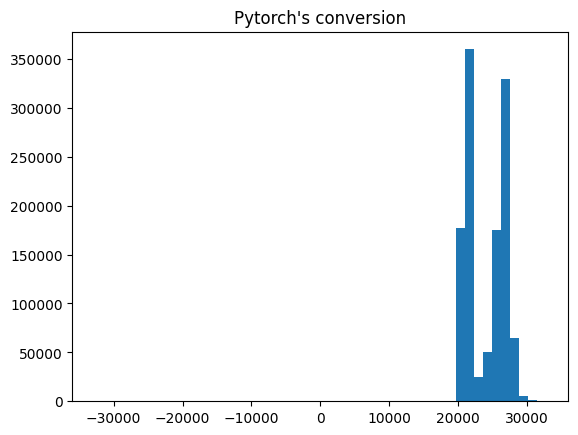

In [9]:
print("min:", img_t.min().item())
print("max:", img_t.max().item())

plt.title("Pytorch's conversion")
plt.hist(img_t.view(-1).numpy(), 50);

#### ¿How does Numpy(pytorch) convert uint16 to int16? 

The difference between the histograms is caused because internally in the pytorch library, the PIL image is converted to a `np.int16` numpy array:

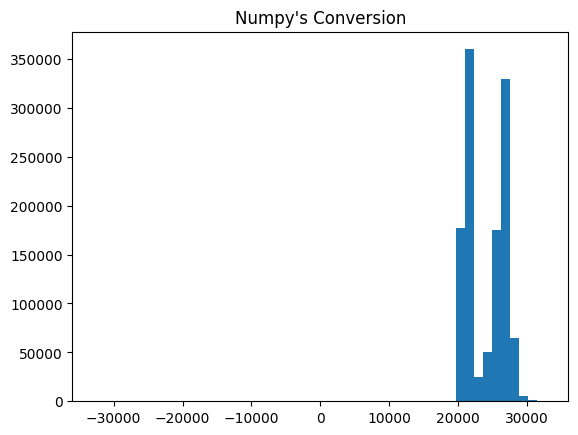

In [10]:
plt.title("Numpy's Conversion")
plt.hist(np.array(img, dtype=np.int16).reshape(-1), 50);

And to convert between the two dtypes, numpy basically moves the values that would overflow in the positive side of `np.int16` to the negative side:

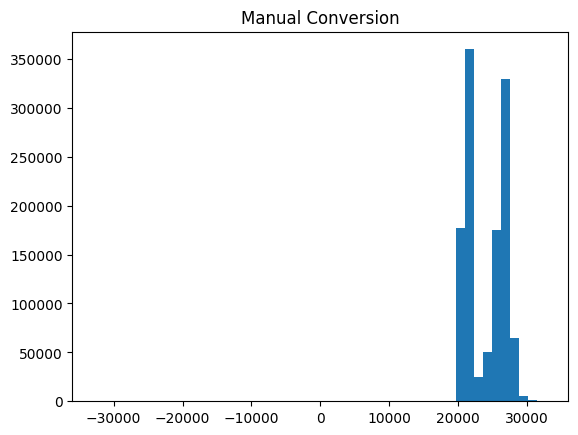

In [11]:
img_arr = img_arr.astype(np.float32)
arr2 = np.where(img_arr <= 2**15-1, img_arr, -2**15 + 1 + (img_arr % 2**15 - 1))
plt.title("Manual Conversion")
plt.hist(arr2.reshape(-1), 50);


### Conclusion

Don't use pytorch(torchvision) `ToTensor` transform. Instead convert the PIL images to tensor manually.